In [4]:
include("DiscreteMaps.jl")
using DiscreteMaps, HDF5, JLD, PyPlot, Distributions, Dates
path = "../Dropbox/results/lrb";

INFO: Loading help data...


In [18]:
module rbgc
using Dates
export RBGContainer
type RBGContainer
#    rundate::DateTime
    PInitial::String
    startstring::String
    M::Integer
    N::Integer
    deps::Float64
    kr::Integer
    chisq::Array{Float64}
    A0::Array{Float64}
    A1::Array{Float64}
#    epsrange::Array{Float64}
#    eA::Array{Float64}
#    vA::Array{Float64}
end
end
import rbpc
#rundate=DateTime(2015,07,06,10,00,00)
RBGv = rbgc.RBGContainer[]
for x in ["c","e"]
    startstring = "rbug$x"
    PInitial = "Lg$x"
    files = DiscreteMaps.searchdirh5(path,["$(startstring)-","-$(PInitial)-"#,replace(string(rundate),":","-")
    ])
    for f in files
        L = JLD.load("$(path)/$f")
        N = L["N"]
        M = length(L["epsv"])
        depses = diff(sort(L["epsv"]))
        if maximum(depses) - minimum(depses)>100*eps(maxabs(L["epsv"]))
            error("Parameter (epsilon) values are not equally spaced")
        end
        kr = int(float(f[14:15]))# eek, learn 2 string
        deps = mean(depses)
        chklr = DiscreteMaps.checklinearresponse(L)
        #   rundate = DateTime(1,1,1,1,1,1)
        PInitial = PInitial
        startstring = startstring
        push!(RBGv,rbgc.RBGContainer(PInitial,startstring,M,N,deps,kr,chklr[1],chklr[3:4]...))
    end
    length(RBGv) |> println
end


8
92


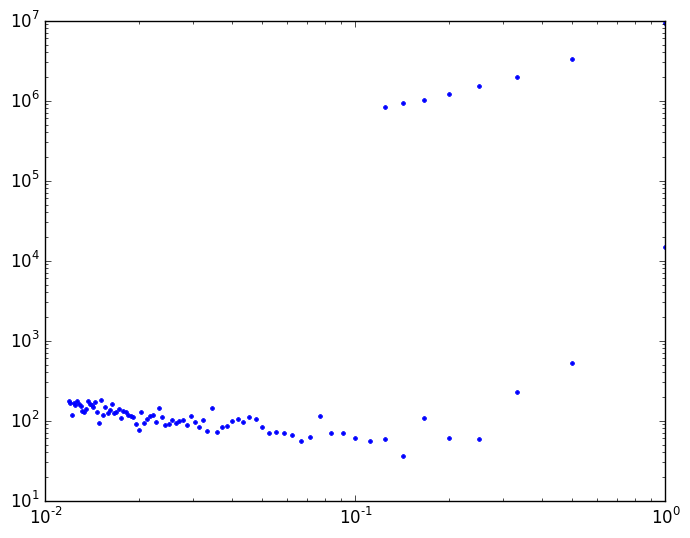

([A,A,A,A,A,A,A,A,A,A  …  A,A,A,A,A,A,A,A,A,A],[-25.3658,-25.1664,-24.9671,-24.7677,-24.5683,-24.369,-24.1696,-23.9703,-23.7709,-23.5715  …  0.690362,0.694414,0.807964,0.810735,0.585762,0.58694,0.920767,0.922563,0.274073,0.274634])

In [99]:
sp = sortperm([RBG.kr for RBG in RBGv])
#sp = sp[(RBP.deps < 1e-6) for RBP in RBPv[sp]]
#for i = [1:length(RBPv[1].chisq)]#[DiscreteMaps.sdvs .> 0]
    loglog(1./[RBG.kr for RBG in RBGv][sp],[maximum(RBG.chisq)-(RBG.M-2) for RBG in RBGv][sp],".")
#    hold(true)
#end
#axis([(10^-8),(10^-4),1.,10^4])
DiscreteMaps.logisticgaussnearcoAc(1/1)

In [152]:
depsh = 1e-6
M = DiscreteMaps.logistic(3.8)
mu = DiscreteMaps.spectralacim(M,100,verbose=false)[1]
Mp = DiscreteMaps.logistic(3.8+depsh)
mup = DiscreteMaps.spectralacim(Mp,100,verbose=false)[1];


11.196586047439698
1.2283240024689845


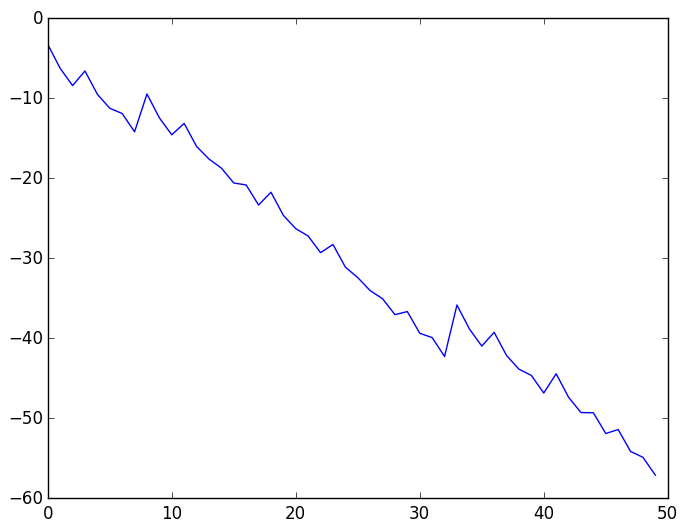

In [140]:
#CO = DiscreteMaps.criticalorbit(DiscreteMaps.logistic(3.8),Npts);
#plot(mu)
alpha = (DiscreteMaps.lyapunov(M,mu)).^(1/8)
nst = -1/4 * log(depsh*10) /log(alpha)
nst |> println
plot(log(DiscreteMaps.criticalorbit(DiscreteMaps.logistic(3.8)).mag)/log(alpha))
alpha |> println

In [141]:
hgd=linspace(0.05001,0.94999,10000)
pgd=hgd[1:end-1]+diff(hgd[1:2])[1]/2
rhopgd = DiscreteMaps.measureint(hgd,mu)[1]/diff(hgd)[1]
rhopgdp = DiscreteMaps.measureint(hgd,mup)[1]/diff(hgd)[1];

In [154]:
plot(pgd,[rhopgd rhopgdp])
plot(DiscreteMaps.criticalorbit(DiscreteMaps.logistic(3.8)).pts[100],[0.],"o")
#maxtheta = [find(RBG.chisq.==maximum(RBG.chisq))for RBG in RBGv]
#for i = 1:8
#    Ad = DiscreteMaps.logisticgaussnearcoA(1./(RBGv[i].kr))[maxtheta[i]][1](pgd)
#    plot(pgd,Ad/mean(Ad)*0.000010)
#end
axis([0.8,1,0.0,40])

LoadError: BoundsError()
while loading In[154], in expression starting on line 2

In [159]:
find(0.692 .< DiscreteMaps.criticalorbit(DiscreteMaps.logistic(3.8)).pts .< 0.696)

1-element Array{Int64,1}:
 21